In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt

2024-02-18 13:29:26.789865: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-18 13:29:26.954367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 13:29:26.954499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 13:29:26.986158: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 13:29:27.053063: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-18 13:29:27.054145: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

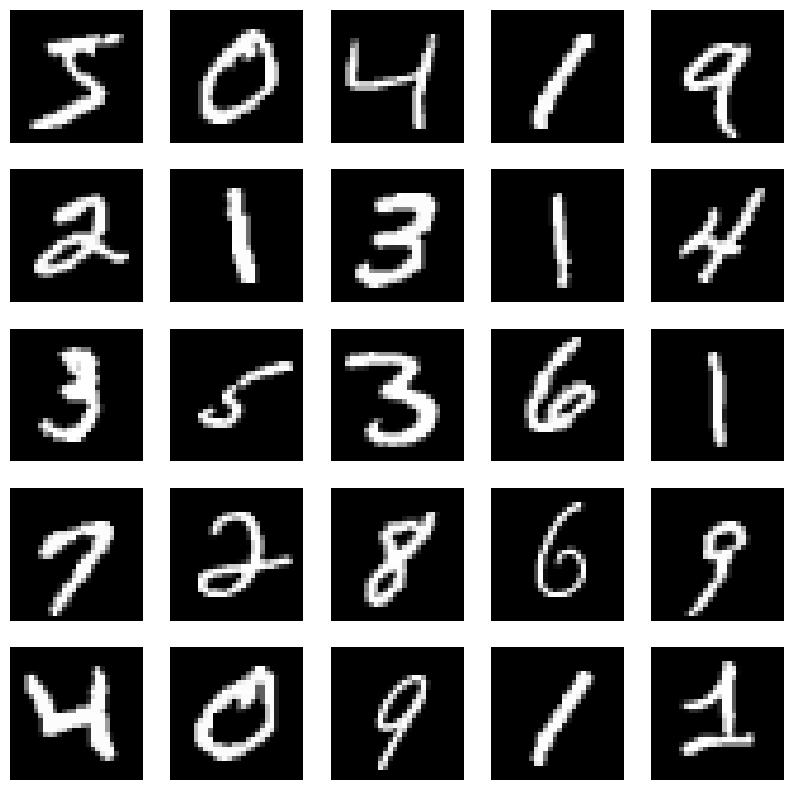

In [4]:
# Display the first 25 training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
# Create a sequential model
model = models.Sequential()

# Add a flatten layer to convert the input shape to a 1D array
model.add(layers.Flatten(input_shape=(28, 28)))

# Add a dense layer with 128 units and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add another dense layer with 128 units and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Add a dense layer with 10 units and softmax activation function for classification
model.add(layers.Dense(10, activation='softmax'))

In [6]:
#Compiles the model with the specified optimizer, loss function, and metrics.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Train the model and store the training history
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10


/home/alexisphysics/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 4s 2ms/step - loss: 1.8802 - accuracy: 0.8593 - val_loss: 0.5415 - val_accuracy: 0.9081
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.9231 - val_loss: 0.3194 - val_accuracy: 0.9353
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2468 - accuracy: 0.9409 - val_loss: 0.2923 - val_accuracy: 0.9323
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1900 - accuracy: 0.9498 - val_loss: 0.2057 - val_accuracy: 0.9486
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1563 - accuracy: 0.9586 - val_loss: 0.2621 - val_accuracy: 0.9364
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1476 - accuracy: 0.9602 - val_loss: 0.1983 - val_accuracy: 0.9515
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1305 - accuracy: 0.9651 - val_loss: 0.2014 - val_accuracy: 0.9504
Epo

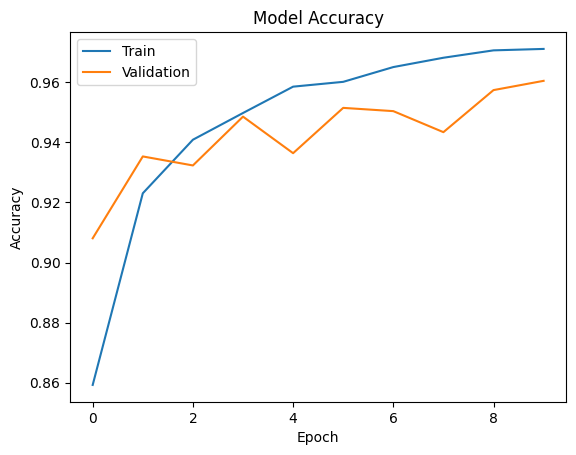

In [8]:
# Plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 - 0s - loss: 0.2010 - accuracy: 0.9608 - 433ms/epoch - 1ms/step
313/313 [==============================] - 0s 1ms/step


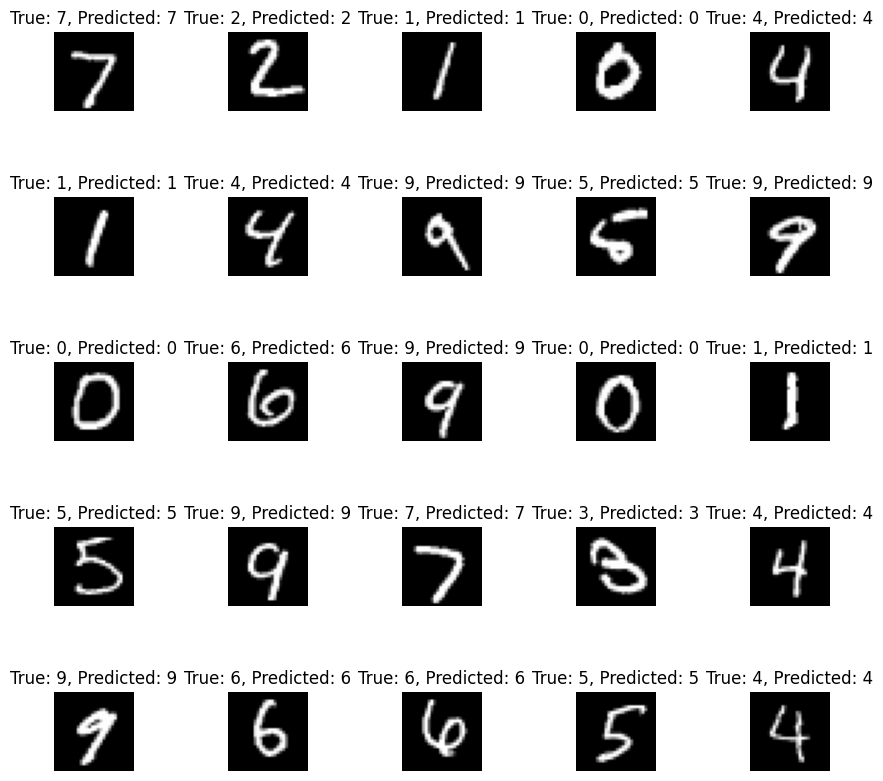

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Make predictions
predictions = model.predict(test_images)

# Visualize the evaluation results
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {test_labels[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.subplots_adjust(wspace=1.2, hspace=0.5)  # Adjust the spacing between subplots
plt.show()